In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.shape

(600, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df[df.duplicated()].shape

(0, 6)

In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<ipython-input-9-88b400599b52>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


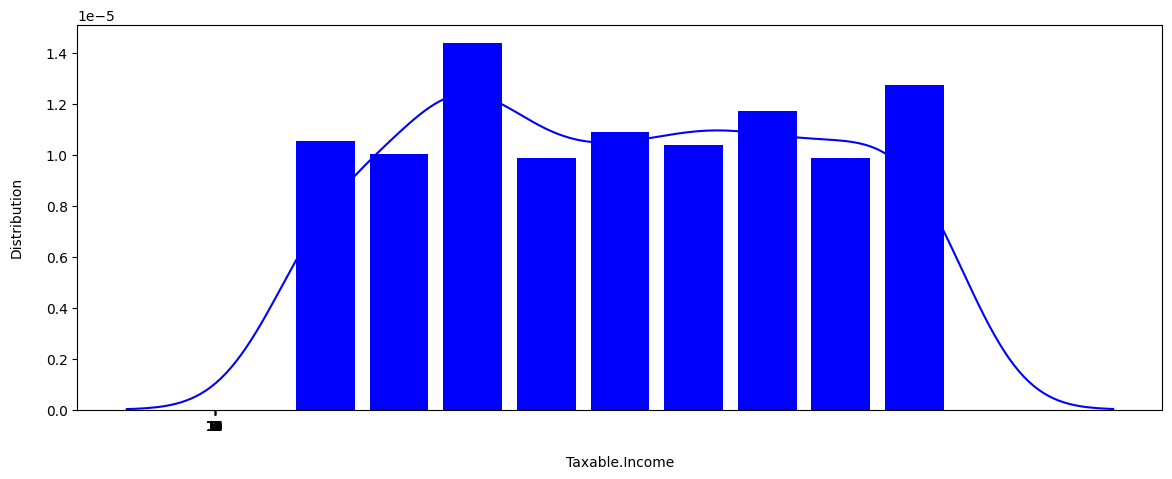

In [9]:
import seaborn as sns
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

In [10]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [11]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

<ipython-input-12-9491e4da7213>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


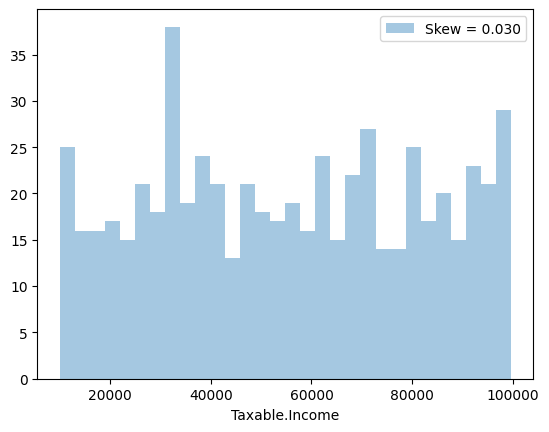

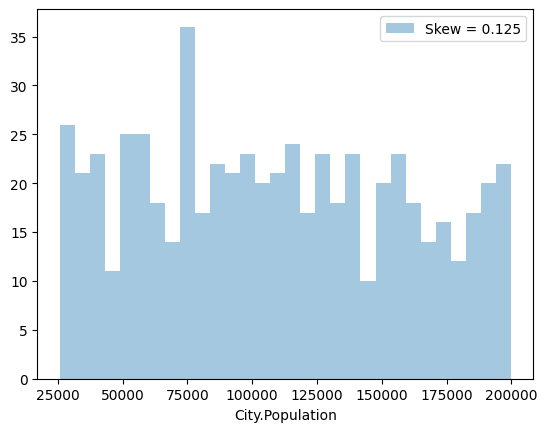

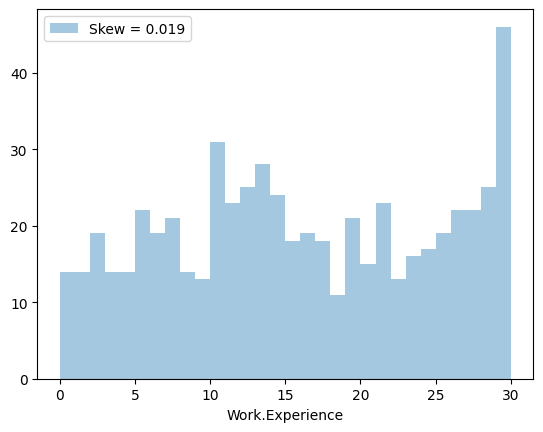

In [12]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

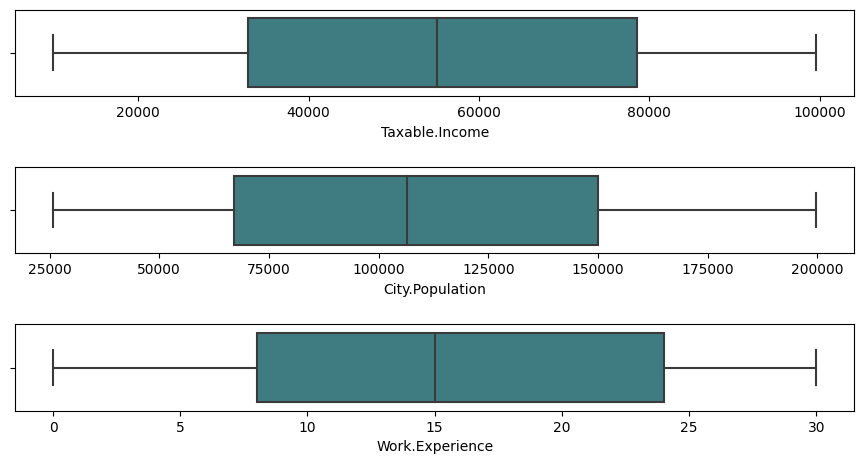

In [13]:
fig, axes = plt.subplots(3,1,figsize=(9,5),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data= df,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data= df,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data= df,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

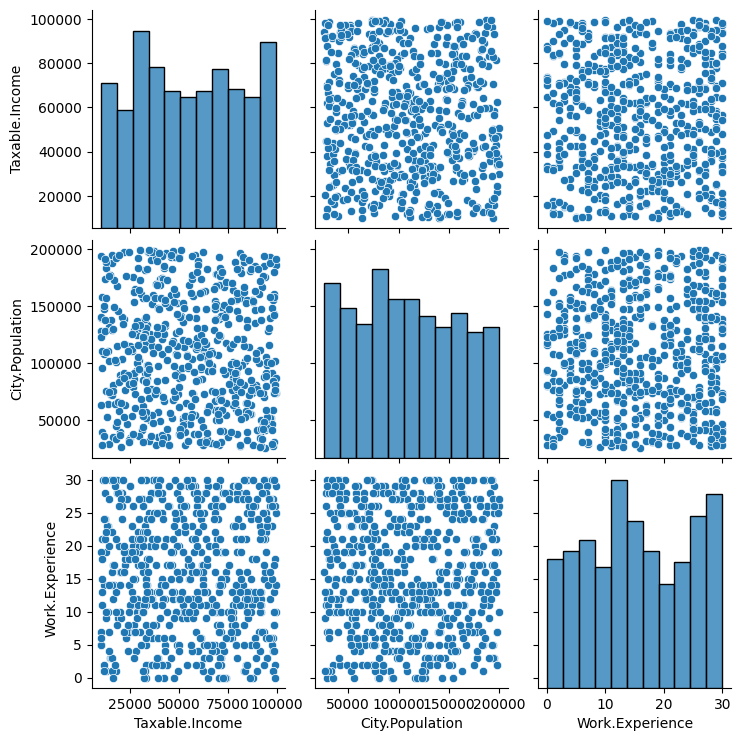

In [14]:
sns.pairplot(df)
plt.show()

<ipython-input-15-2bb9e77f7a5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")


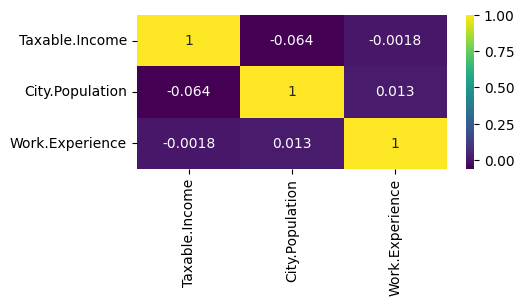

In [15]:
fig, ax = plt.subplots(figsize=(5,2))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [16]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [17]:
df = pd.get_dummies(df)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [18]:
df['Taxable_Income1'] = pd.cut(x = df['Taxable.Income'], bins = [10003,30000,99620], labels=['Risky','Good'], right = False)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income1
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [19]:
df.drop('Taxable.Income',axis=1, inplace =True)

In [20]:
df.Taxable_Income1.value_counts()

Good     476
Risky    124
Name: Taxable_Income1, dtype: int64

In [21]:
df['Taxable_Income'] = df.Taxable_Income1
df.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income1,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,Good,Good
1,134075,18,0,1,1,0,0,0,1,Good,Good
2,160205,30,1,0,0,1,0,0,1,Good,Good
3,193264,15,0,1,0,0,1,0,1,Good,Good
4,27533,28,1,0,0,1,0,1,0,Good,Good


In [22]:
df.drop('Taxable_Income1',axis=1,inplace=True)

In [24]:
from sklearn import preprocessing
label_enocoder = preprocessing.LabelEncoder()
df['Taxable_Income1'] = label_enocoder.fit_transform(df['Taxable_Income'])

In [25]:
df.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income,Taxable_Income1
0,50047,10,1,0,0,0,1,0,1,Good,0
1,134075,18,0,1,1,0,0,0,1,Good,0
2,160205,30,1,0,0,1,0,0,1,Good,0
3,193264,15,0,1,0,0,1,0,1,Good,0
4,27533,28,1,0,0,1,0,1,0,Good,0


In [26]:
x = df.iloc[:,0:9]
y = df['Taxable_Income1']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [28]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 9) (120, 9) (480,) (120,)


In [29]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.model_selection import  KFold,cross_val_score
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000,max_features=5,criterion='gini')
results = cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7366666666666666


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
mean_square_error = mean_squared_error(y_test, y_pred)
R_Squared = r2_score(y_test, y_pred)
print("Mean Squared Error:" ,mean_square_error)
print("R-squared (R2) Score:", R_Squared)

Mean Squared Error: 0.20934916666666667
R-squared (R2) Score: -0.1702748447204967
